In [1]:
data <- read.csv('../scripts/ChEC_scores_combined_withnirs_std_20200406.csv')

# Confirmatory Factor Analysis: Child Behavior Questionnaire-Short Form
Below we conduct a confirmatory factor analysis on our CBQ-SF data to confirm a 3-factor structure exists consistent with the original CBQ.

Parallel analysis suggests that the number of factors =  4  and the number of components =  3 


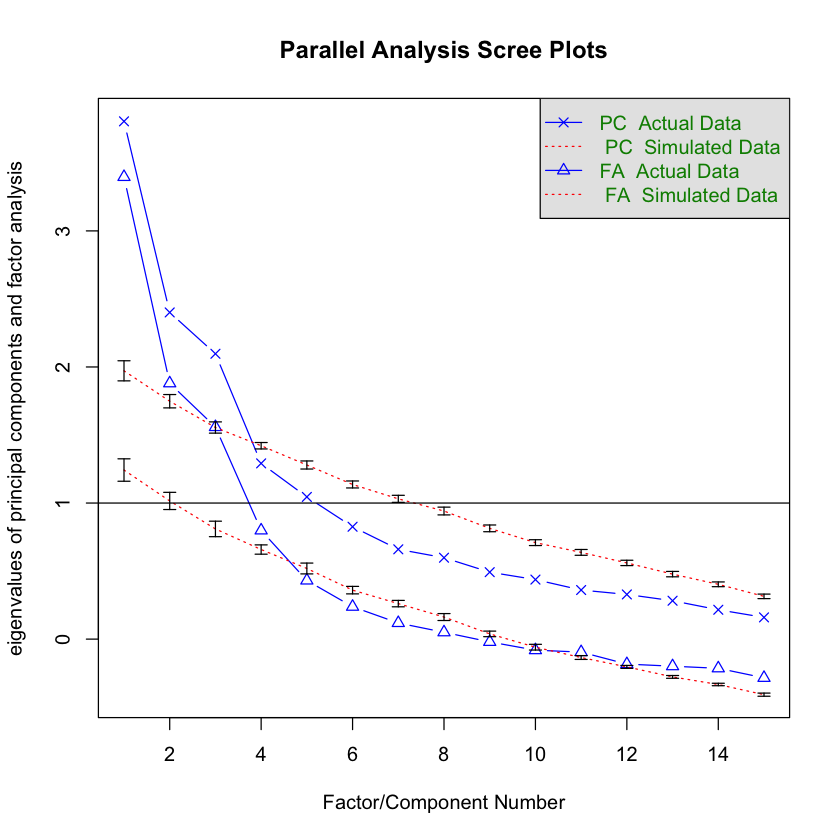

In [4]:
library(psych)
cbq_data <- data[,7:21]

cor_mtx <- cor(cbq_data)
fa.parallel(cor_mtx, fa='both', n.obs=58, fm='ml', SMC=TRUE, error.bars=TRUE, se.bars=TRUE)

In [7]:
model3 <- fa(cbq_data,3,fm='ml',rotate='oblimin')
model3

Factor Analysis using method =  ml
Call: fa(r = cbq_data, nfactors = 3, rotate = "oblimin", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                    ML1   ML2   ML3    h2   u2 com
cbqsf_activity     0.75 -0.03  0.16 0.602 0.40 1.1
cbqsf_angfrus      0.27  0.65 -0.01 0.546 0.45 1.3
cbqsf_approach     0.36  0.23  0.39 0.378 0.62 2.6
cbqsf_attenfoc    -0.56  0.07  0.27 0.361 0.64 1.5
cbqsf_discomf     -0.05  0.69  0.06 0.473 0.53 1.0
cbqsf_fallreact   -0.37 -0.37  0.36 0.435 0.57 3.0
cbqsf_fear        -0.01  0.26  0.03 0.069 0.93 1.0
cbqsf_hip          0.58  0.01  0.20 0.396 0.60 1.2
cbqsf_impulsivity  0.75 -0.05  0.31 0.693 0.31 1.3
cbqsf_inhibctl    -0.84 -0.14  0.29 0.806 0.19 1.3
cbqsf_lip         -0.10  0.18  0.45 0.223 0.78 1.4
cbqsf_percepsens  -0.14  0.18  0.50 0.275 0.72 1.4
cbqsf_sad         -0.09  0.77  0.11 0.583 0.42 1.1
cbqsf_shy         -0.49  0.42 -0.15 0.400 0.60 2.2
cbqsf_smilelaugh   0.15  0.03  0.72 0.551 0.45 1.1

           

In [2]:
data$cbqsf_NEG <- (data$cbqsf_angfrus + data$cbqsf_discomf + (8-data$cbqsf_fallreact) + data$cbqsf_fear + data$cbqsf_sad)/5

# Mixed Effects Model Predicting PFC activation
Below we test the following predictors of PFC activation during social condition frustration: child age, temperamental negative affectivity.  Sex is entered as a covariate of non-interest (given the small sample size).

In [34]:
library(lme4)
library(lmerTest)

mdl1 = lmer('right_mPFC_beta_soc_fru_min_soc_rew ~ child_age + cbqsf_NEG + (1|male)', data=data, REML=FALSE)
summary(mdl1)

mdl2 = lmer('right_mPFC_beta_soc_fru_min_soc_rew ~ child_age + cbqsf_NEG + cbqsf_NEG*child_age + (1|male)', data=data, REML=FALSE)
summary(mdl2)

anova(mdl1, mdl2)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: 
"right_mPFC_beta_soc_fru_min_soc_rew ~ child_age + cbqsf_NEG + (1|male)"
   Data: data

     AIC      BIC   logLik deviance df.resid 
   488.3    498.3   -239.2    478.3       49 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8009 -0.6049  0.1523  0.4953  2.4052 

Random effects:
 Groups   Name        Variance Std.Dev.
 male     (Intercept)   0.0     0.00   
 Residual             411.6    20.29   
Number of obs: 54, groups:  male, 2

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)   50.182     21.307 54.000   2.355   0.0222 *
child_age     -1.822      2.253 54.000  -0.808   0.4224  
cbqsf_NEG     -9.432      3.961 54.000  -2.381   0.0208 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) chld_g
child_age -0.668       
cbqsf_NEG -0.772  0.061
convergence cod

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: 
"right_mPFC_beta_soc_fru_min_soc_rew ~ child_age + cbqsf_NEG + cbqsf_NEG*child_age + (1|male)"
   Data: data

     AIC      BIC   logLik deviance df.resid 
   485.8    497.7   -236.9    473.8       48 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.42388 -0.65654  0.03006  0.60750  2.46928 

Random effects:
 Groups   Name        Variance Std.Dev.
 male     (Intercept)   0.0     0.00   
 Residual             378.4    19.45   
Number of obs: 54, groups:  male, 2

Fixed effects:
                    Estimate Std. Error       df t value Pr(>|t|)  
(Intercept)         -113.752     78.075   54.000  -1.457   0.1509  
child_age             25.497     12.742   54.000   2.001   0.0504 .
cbqsf_NEG             33.121     19.925   54.000   1.662   0.1023  
child_age:cbqsf_NEG   -7.110      3.268   54.000  -2.175   0.0340 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mdl1,5,488.3290,498.2739,-239.1645,478.3290,NA,NA,NA
mdl2,6,485.7922,497.7261,-236.8961,473.7922,4.536727,1,0.03317497


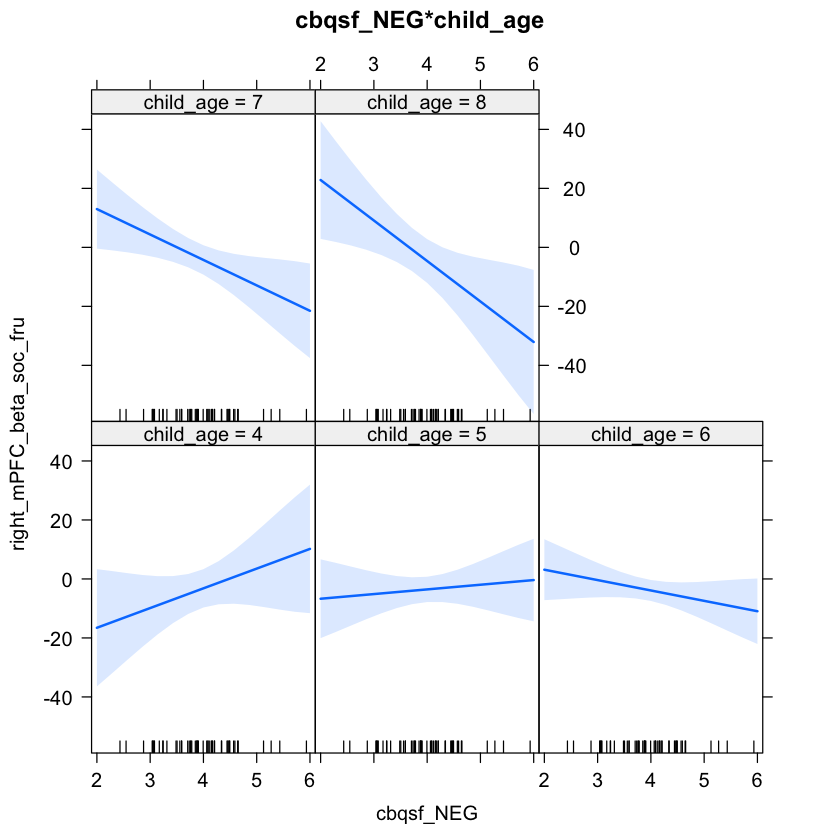

In [29]:
library(effects)

eff2 <- Effect(c('cbqsf_NEG','child_age'), mdl2)
plot(eff2, main='cbqsf_NEG*child_age')

# Mixed-Effects Modeling Predicting Gaze Behavior
Below we test the following predictors of gaze behavior while viewing Angry and Happy Faces: child age, temperamental negative affectivity.  Sex is entered as a covariate of non-interest (given the small sample size).

In [5]:
library(lme4)
library(lmerTest)

mdl1 = lmer('Angry_Face_mouth_firstfix ~ child_age + cbqsf_NEG + (1|male)', data=data, REML=FALSE)
summary(mdl1)

mdl2 = lmer('Angry_Face_mouth_firstfix ~ child_age + cbqsf_NEG + cbqsf_NEG*child_age + (1|male)', data=data, REML=FALSE)
summary(mdl2)

anova(mdl1, mdl2)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: "Angry_Face_mouth_firstfix ~ child_age + cbqsf_NEG + (1|male)"
   Data: data

     AIC      BIC   logLik deviance df.resid 
   661.1    670.8   -325.6    651.1       46 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0139 -0.7148 -0.1158  0.5714  2.6444 

Random effects:
 Groups   Name        Variance Std.Dev.
 male     (Intercept)  1051     32.42  
 Residual             19842    140.86  
Number of obs: 51, groups:  male, 2

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)   194.50     157.38  50.95   1.236   0.2222  
child_age      36.84      15.89  49.50   2.318   0.0246 *
cbqsf_NEG     -46.83      30.35  49.26  -1.543   0.1293  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) chld_g
child_age -0.632       
cbqsf_NEG -0.780  0.047

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: 
"Angry_Face_mouth_firstfix ~ child_age + cbqsf_NEG + cbqsf_NEG*child_age + (1|male)"
   Data: data

     AIC      BIC   logLik deviance df.resid 
   662.9    674.5   -325.4    650.9       45 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0405 -0.7806 -0.1347  0.6440  2.6627 

Random effects:
 Groups   Name        Variance Std.Dev.
 male     (Intercept)  1224     34.99  
 Residual             19672    140.26  
Number of obs: 51, groups:  male, 2

Fixed effects:
                    Estimate Std. Error      df t value Pr(>|t|)
(Intercept)          -112.98     632.54   49.88  -0.179    0.859
child_age              87.04     100.99   49.88   0.862    0.393
cbqsf_NEG              34.20     163.75   49.90   0.209    0.835
child_age:cbqsf_NEG   -13.25      26.25   50.09  -0.505    0.616

Correlation of Fixed Effects:
            (Intr) chld_g cb_NEG
child_age   -0.9

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mdl1,5,661.1128,670.7719,-325.5564,651.1128,NA,NA,NA
mdl2,6,662.8669,674.4578,-325.4334,650.8669,0.2458852,1,0.6199875


In [6]:
library(lme4)
library(lmerTest)

mdl1 = lmer('Happy_Face_mouth_firstfix ~ child_age + cbqsf_NEG + (1|male)', data=data, REML=FALSE)
summary(mdl1)

mdl2 = lmer('Happy_Face_mouth_firstfix ~ child_age + cbqsf_NEG + cbqsf_NEG*child_age + (1|male)', data=data, REML=FALSE)
summary(mdl2)

anova(mdl1, mdl2)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: "Happy_Face_mouth_firstfix ~ child_age + cbqsf_NEG + (1|male)"
   Data: data

     AIC      BIC   logLik deviance df.resid 
   667.1    676.8   -328.5    657.1       47 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9679 -0.6159 -0.3527  0.7912  2.6780 

Random effects:
 Groups   Name        Variance Std.Dev.
 male     (Intercept)     0      0.0   
 Residual             17993    134.1   
Number of obs: 52, groups:  male, 2

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   495.47     146.32   52.00   3.386 0.001356 ** 
child_age      35.45      14.90   52.00   2.379 0.021057 *  
cbqsf_NEG    -112.49      27.51   52.00  -4.089 0.000151 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) chld_g
child_age -0.666       
cbqsf_NEG -0.793  0.092
convergence co

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: 
"Happy_Face_mouth_firstfix ~ child_age + cbqsf_NEG + cbqsf_NEG*child_age + (1|male)"
   Data: data

     AIC      BIC   logLik deviance df.resid 
   664.5    676.2   -326.3    652.5       46 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0534 -0.6873 -0.2326  0.7649  2.7259 

Random effects:
 Groups   Name        Variance Std.Dev.
 male     (Intercept)     0      0.0   
 Residual             16486    128.4   
Number of obs: 52, groups:  male, 2

Fixed effects:
                    Estimate Std. Error      df t value Pr(>|t|)  
(Intercept)          -576.74     511.41   52.00  -1.128   0.2646  
child_age             214.44      83.34   52.00   2.573   0.0130 *
cbqsf_NEG             164.82     129.91   52.00   1.269   0.2102  
child_age:cbqsf_NEG   -46.46      21.31   52.00  -2.180   0.0338 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Co

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mdl1,5,667.0519,676.8081,-328.5259,657.0519,NA,NA,NA
mdl2,6,664.5045,676.2119,-326.2522,652.5045,4.547402,1,0.03296874


Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.


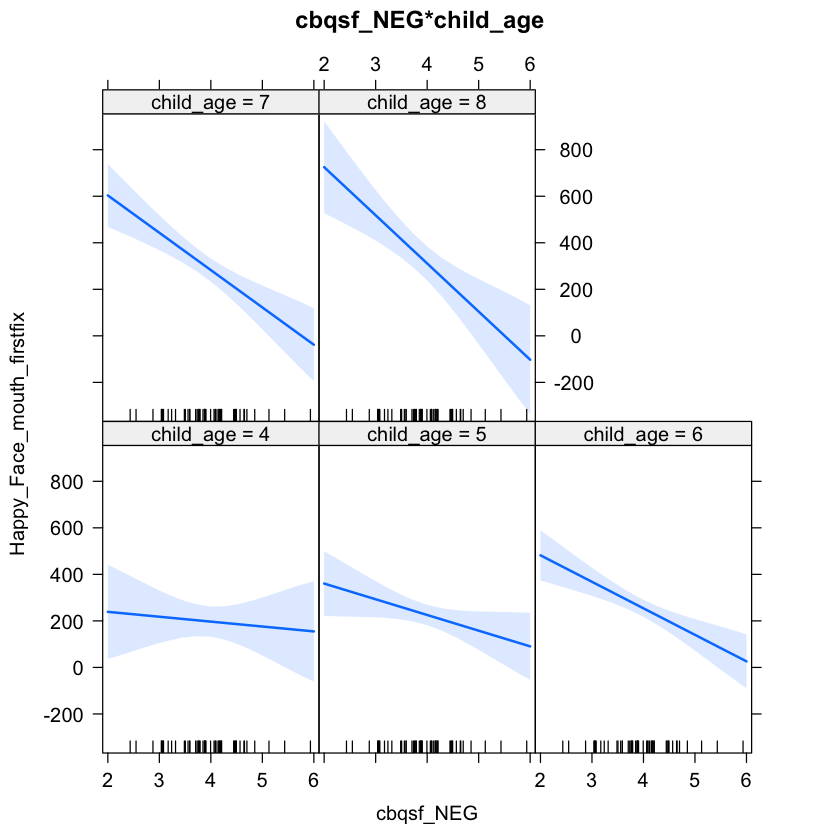

In [7]:
library(effects)

eff2 <- Effect(c('cbqsf_NEG','child_age'), mdl2)
plot(eff2, main='cbqsf_NEG*child_age')

## Mediation Analysis

Below we use the Lavaan library to test if temperamental negative affect mediates the association between eye tracking behavior (fixation on the mouths of happy faces) and prefrontal response to frustration in the Social Cake task (social frustration condition minus the social reward condition).

In [18]:
set.seed(42)
library(lavaan)
model <- '  # direct effect
            right_mPFC_beta_soc_fru_min_soc_rew ~ c*Happy_Face_mouth_firstfix

            # mediation
            cbq_NEG ~ a*Happy_Face_mouth_firstfix
            right_mPFC_beta_soc_fru_min_soc_rew ~ b*cbq_NEG

            # indirect effect
            ab := a*b

            # total effect
            total := c + (a*b)'

fit<-sem(model, data=data, se='bootstrap')
summary(fit, standardize=TRUE)

lavaan 0.6-3 ended normally after 29 iterations

  Optimization method                           NLMINB
  Number of free parameters                          5

                                                  Used       Total
  Number of observations                            49          58

  Estimator                                         ML
  Model Fit Test Statistic                       0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard Errors                            Bootstrap
  Number of requested bootstrap draws             1000
  Number of successful bootstrap draws            1000

Regressions:
                                        Estimate   Std.Err  z-value  P(>|z|)
  right_mPFC_beta_soc_fru_min_soc_rew ~                                     
    Hppy_Fc_m_ (c)                          0.008    0.024    0.327    0.743
  cbq_NEG ~                                                                 
    Hppy_Fc_m_ (a)            

## Mediated Mediation Analysis

Below we use the lavaan library again to test is age mediates the mediation results found above. As can be seen below, only the original mediation was significant.

In [20]:
model <- '  # direct effects
            right_mPFC_beta_soc_fru_min_soc_rew ~ c*Happy_Face_mouth_firstfix
            
            # mediation
            cbq_NEG ~ a*Happy_Face_mouth_firstfix
            right_mPFC_beta_soc_fru_min_soc_rew ~ b*cbq_NEG
            child_age ~ d*Happy_Face_mouth_firstfix
            cbq_NEG ~ e*child_age
            child_age ~ f*cbq_NEG
            right_mPFC_beta_soc_fru_min_soc_rew ~ g*child_age

            # indirect effect
            ab := a*b
            de := d*e
            fg := f*g

            # total effect
            total := c + (a*b) + (d*e) + (f*g)
            
            '
fit<-sem(model, data=data, se='bootstrap')
summary(fit, standardize=TRUE)

Warning message in lavaan(slotOptions = lavoptions, slotParTable = lavpartable, :
“lavaan WARNING: the optimizer warns that a solution has NOT been found!”Warning message in lavaan(slotOptions = lavoptions, slotParTable = lavpartable, :
“lavaan WARNING: the optimizer warns that a solution has NOT been found!”Warning message in lavaan(slotOptions = lavoptions, slotParTable = lavpartable, :
“lavaan WARNING: the optimizer warns that a solution has NOT been found!”Warning message in lavaan(slotOptions = lavoptions, slotParTable = lavpartable, :
“lavaan WARNING: the optimizer warns that a solution has NOT been found!”Warning message in bootstrap.internal(object = NULL, lavmodel. = lavmodel, lavsamplestats. = lavsamplestats, :
“lavaan WARNING: only 995 bootstrap draws were successful”

lavaan 0.6-3 ended normally after 46 iterations

  Optimization method                           NLMINB
  Number of free parameters                         10

                                                  Used       Total
  Number of observations                            49          58

  Estimator                                         ML
  Model Fit Test Statistic                          NA
  Degrees of freedom                                -1
  Minimum Function Value               0.0000000000000

Parameter Estimates:

  Standard Errors                            Bootstrap
  Number of requested bootstrap draws             1000
  Number of successful bootstrap draws             995

Regressions:
                                        Estimate   Std.Err  z-value  P(>|z|)
  right_mPFC_beta_soc_fru_min_soc_rew ~                                     
    Hppy_Fc_m_ (c)                          0.014    0.026    0.547    0.584
  cbq_NEG ~                                         